In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

%matplotlib inline

In [2]:
df = pd.read_csv("Training.csv")
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [3]:
df.shape

(4920, 134)

In [5]:
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

<AxesSubplot:>

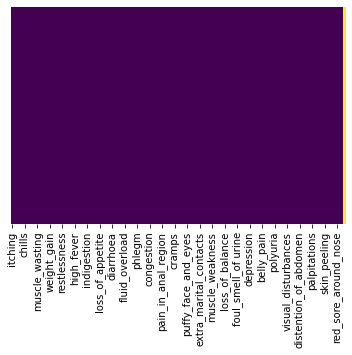

In [6]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

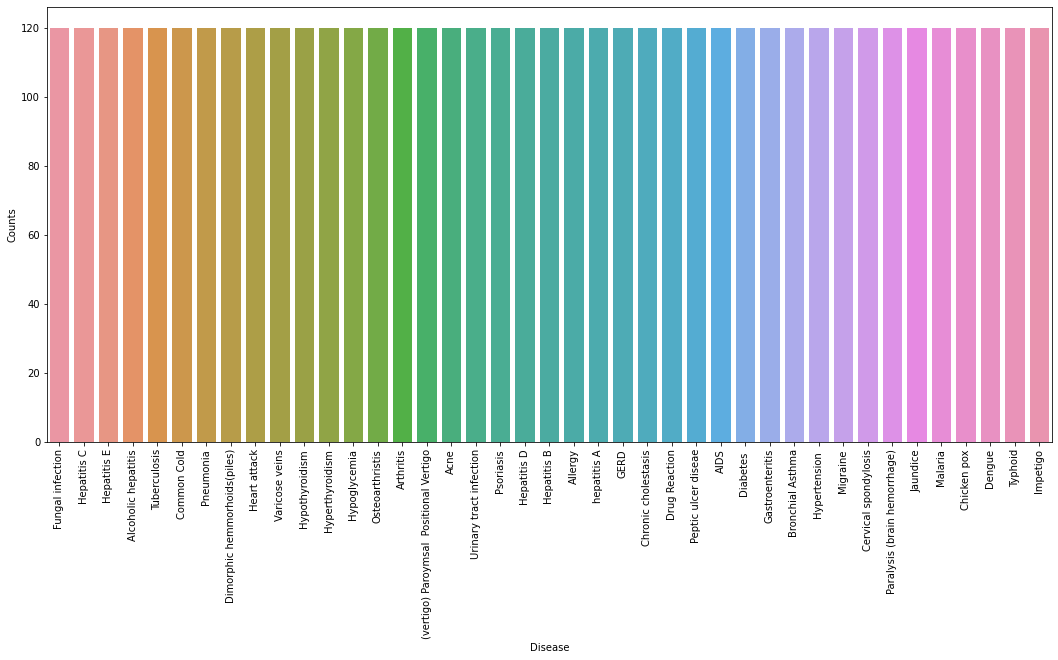

In [7]:
disease_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [8]:
df.drop('Unnamed: 133',inplace=True,axis=1)

In [11]:
for column in df.columns[:-1]:
    print("{} ({}) : {}".format(column, len(df[column].unique()), df[column].unique()))

itching (2) : [1 0]
skin_rash (2) : [1 0]
nodal_skin_eruptions (2) : [1 0]
continuous_sneezing (2) : [0 1]
shivering (2) : [0 1]
chills (2) : [0 1]
joint_pain (2) : [0 1]
stomach_pain (2) : [0 1]
acidity (2) : [0 1]
ulcers_on_tongue (2) : [0 1]
muscle_wasting (2) : [0 1]
vomiting (2) : [0 1]
burning_micturition (2) : [0 1]
spotting_ urination (2) : [0 1]
fatigue (2) : [0 1]
weight_gain (2) : [0 1]
anxiety (2) : [0 1]
cold_hands_and_feets (2) : [0 1]
mood_swings (2) : [0 1]
weight_loss (2) : [0 1]
restlessness (2) : [0 1]
lethargy (2) : [0 1]
patches_in_throat (2) : [0 1]
irregular_sugar_level (2) : [0 1]
cough (2) : [0 1]
high_fever (2) : [0 1]
sunken_eyes (2) : [0 1]
breathlessness (2) : [0 1]
sweating (2) : [0 1]
dehydration (2) : [0 1]
indigestion (2) : [0 1]
headache (2) : [0 1]
yellowish_skin (2) : [0 1]
dark_urine (2) : [0 1]
nausea (2) : [0 1]
loss_of_appetite (2) : [0 1]
pain_behind_the_eyes (2) : [0 1]
back_pain (2) : [0 1]
constipation (2) : [0 1]
abdominal_pain (2) : [0 1]
d

In [13]:
testing = pd.read_csv("Testing.csv")

In [14]:
X_train = df.drop('prognosis', axis=1)
y_train = df['prognosis']
y_train = np.array(y_train).reshape(y_train.shape[0], 1)

X_test = testing.drop('prognosis', axis=1)
y_test = testing['prognosis']
y_test = np.array(y_test).reshape(y_test.shape[0], 1)

print("X_train : {} \ny_train : {} \nX_test: {} \ny_test : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train : (4920, 132) 
y_train : (4920, 1) 
X_test: (42, 132) 
y_test : (42, 1)


In [15]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

pred = tree.predict(X_test)
acc = tree.score(X_test, y_test)

print("Acurray on test set: {:.2f}%".format(acc*100))

Acurray on test set: 97.62%


In [16]:
print(classification_report(y_test, pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           